In [2]:
import cv2
from matplotlib import pyplot as plt

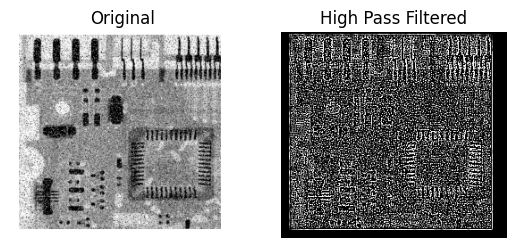

In [3]:
import numpy as np


img = cv2.imread("noisy_image.png")
# Define high-pass kernel (Laplacian operator)
hp_kernel = np.array([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])

# Apply kernel using filter2D
high_pass = cv2.filter2D(img, -1, hp_kernel)

# Display
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(high_pass, cmap='gray'); plt.title('High Pass Filtered'); plt.axis('off')
plt.show()

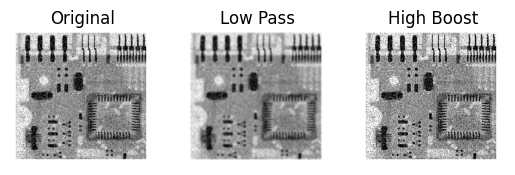

In [21]:
A = 1.5  # High boost factor (experiment with different values)

low_pass = cv2.GaussianBlur(img, (5, 5), 0)

# High boost image
high_boost = cv2.addWeighted(img, A, low_pass, -(A - 1), 0)
high_boost = np.clip(high_boost, 0, 255).astype(np.uint8)

# Display
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(low_pass, cmap='gray'); plt.title('Low Pass'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(high_boost, cmap='gray'); plt.title('High Boost'); plt.axis('off')
plt.show()